In [1]:
import os.path as osp
import sys
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append(str(Path(osp.abspath("")).parent))

%config InlineBackend.figure_format='retina'

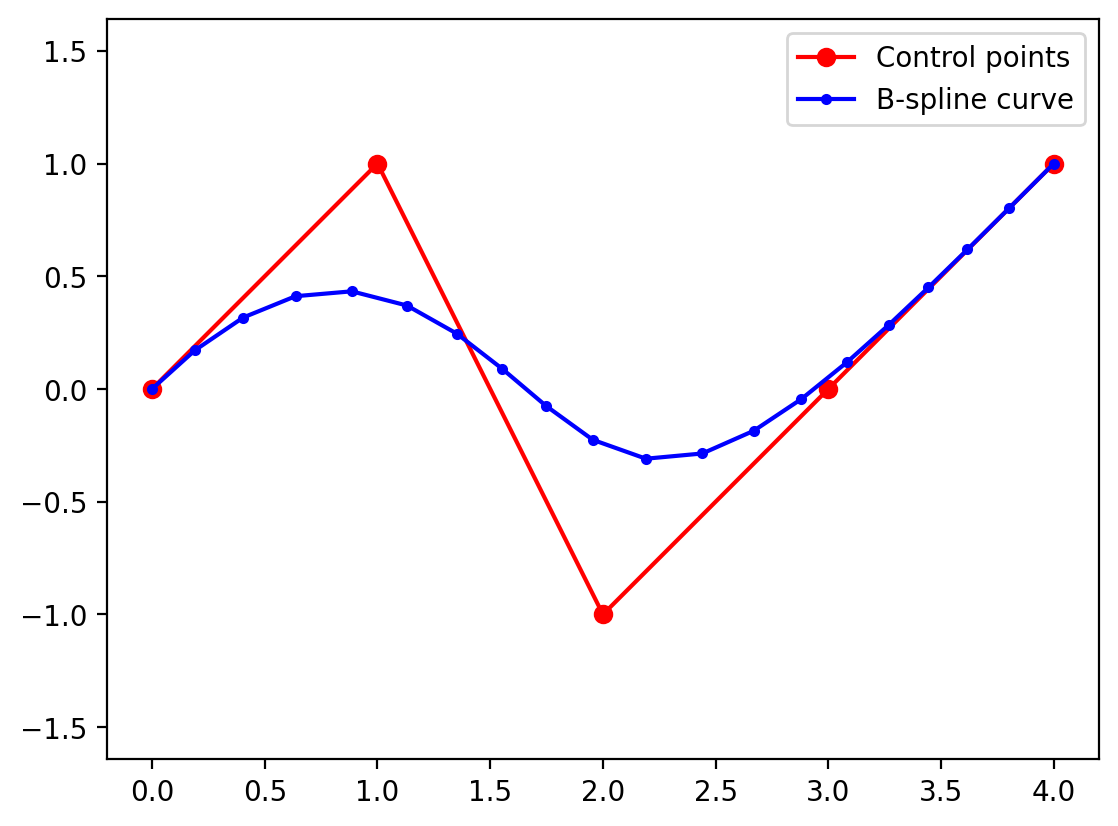

In [2]:
from core.curve import BSpline
import numpy as np

control_points = np.array([[0, 0], [1, 1], [2, -1], [3, 0], [4, 1]])
degree = 3
knots = np.array(object=[0, 0, 0, 0, 0.5, 1, 1, 1, 1])
spline = BSpline(control_points, degree, knots)

# 按弧长均匀采样20个点
points = spline.get_points(20, arc_equal=True)
plt.plot(control_points[:, 0], control_points[:, 1], "ro-", label="Control points")
plt.plot(points[:, 0], points[:, 1], "b.-", label="B-spline curve")
plt.axis("equal")
plt.legend()
plt.show()

In [3]:
spline

BSpline curve: 5 control points, degree 3
  control points: [[0, 0], [1, 1], [2, -1], [3, 0], [4, 1]]
  knots: [0.  0.  0.  0.  0.5 1.  1.  1.  1. ]
  length: 4.833840136359904

In [4]:
arc_lengths = np.linspace(0, spline.length, 20)
# 根据弧长计算对应的参数u,由反插值得到
us = spline.get_u_from_length(arc_lengths)
# 使用高斯积分计算精确的弧长
lengths = np.array([spline.get_length(u) for u in us])
# 比较两种方法计算的弧长
print("Error in arc length: ", np.abs(lengths - arc_lengths))

Error in arc length:  [0.00000000e+00 6.82987966e-04 6.30420797e-03 3.44292660e-03
 7.06482996e-04 9.01984689e-05 4.83458047e-04 6.32975775e-04
 6.72146305e-04 2.92498764e-03 5.67740577e-06 9.19240096e-04
 5.58515929e-03 5.66735070e-03 2.25312669e-03 5.40948947e-03
 1.88028678e-02 3.17623709e-02 2.56130485e-02 0.00000000e+00]


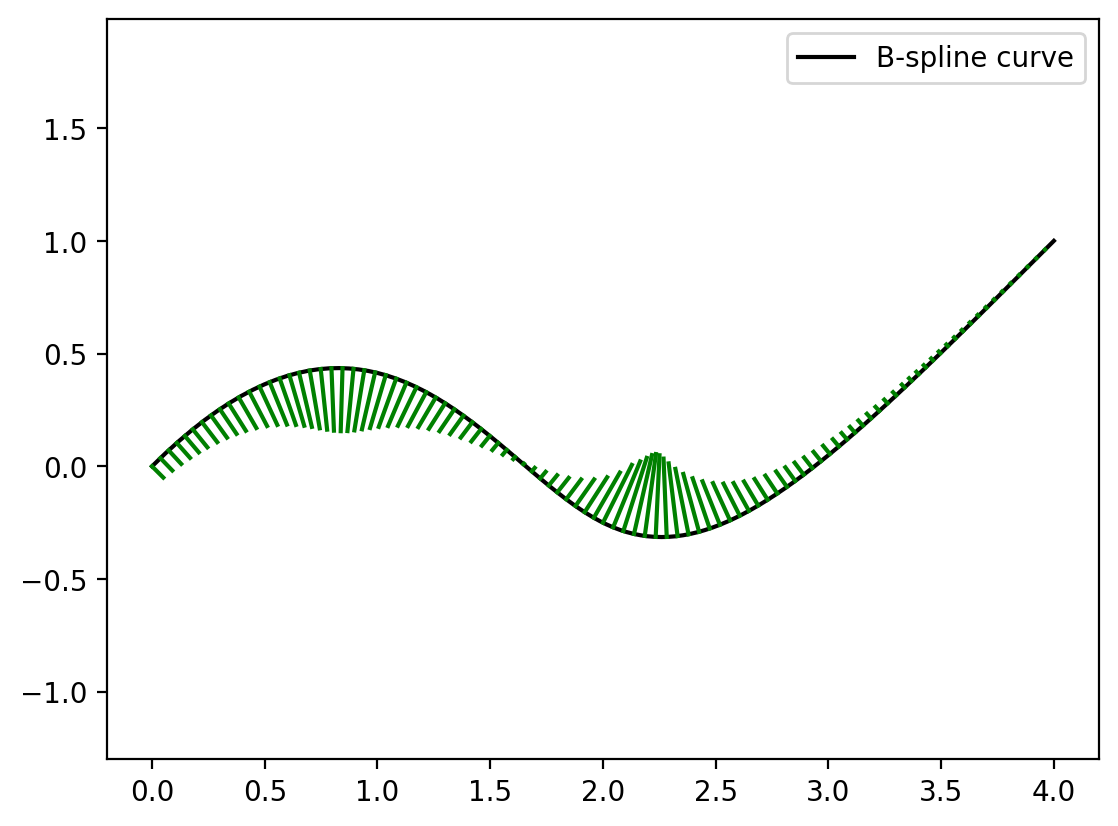

In [5]:
def normalize(v):
    return v / np.linalg.norm(v, axis=1, keepdims=True)


spline_pts = spline.get_points(100)
plt.plot(spline_pts[:, 0], spline_pts[:, 1], "k-", label="B-spline curve")

us = spline.arc_parameter(np.linspace(0, spline.length, 100))
points = spline(us)
# 切向量
tangents = normalize(spline.derivative(us))
# 法向量
normals = np.stack([-tangents[:, 1], tangents[:, 0]], axis=1)
# 曲率值
curvatures = spline.curvature(us)
amplitude = 0.2
end_points = points + normals * curvatures[:, np.newaxis] * amplitude

for start, end in zip(points, end_points):
    plt.plot([start[0], end[0]], [start[1], end[1]], "g-")

plt.axis("equal")
plt.legend()
plt.show()